prompt: i will be using the credit card fraud dataset. load the necessary libraries for working with data, visualization and machine learning modeling.
AI: ChatGPT 4o mini

In [1]:
# For working with data
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


prompt: now load the data form card_transdata (1).csv and display general information
AI:ChatGPT 4o mini

In [2]:
# Load the dataset
df = pd.read_csv('card_transdata (1).csv')

# Display general information about the dataset
df.info()

# Display the first few rows to get a sense of the data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


prompt: check for missing values, drop null values and dsiplay few rows
AI:ChatGPT 4o mini

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f'Missing values in each column before dropping:\n{missing_values}')

# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify that all missing values are dropped
missing_values_after_drop = df_cleaned.isnull().sum()
print(f'Missing values after dropping nulls:\n{missing_values_after_drop}')

# Display the first few rows of the cleaned dataset
print(f'First few rows after dropping null values:\n{df_cleaned.head()}')


Missing values in each column before dropping:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64
Missing values after dropping nulls:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
First few rows after dropping null values:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                      

prompt: VISUALIZE THE CLASS DISTRIBUTION
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/2691677518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='fraud', palette='coolwarm')


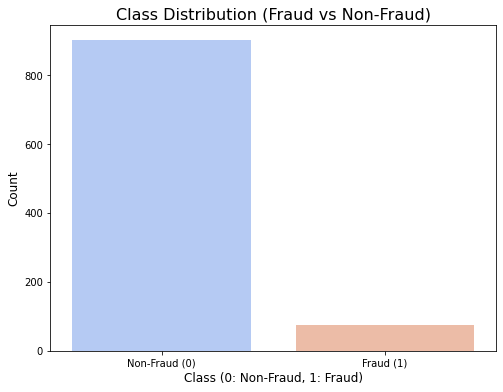

In [5]:
# Visualize the class distribution of the target variable 'fraud'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='fraud', palette='coolwarm')
plt.title('Class Distribution (Fraud vs Non-Fraud)', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

prompt: Visualize the used pin number distribution
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/4208202308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='used_pin_number', palette='viridis')


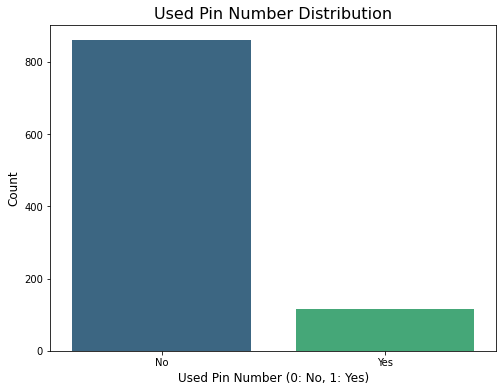

In [6]:
# Visualize the distribution of 'used_pin_number' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='used_pin_number', palette='viridis')
plt.title('Used Pin Number Distribution', fontsize=16)
plt.xlabel('Used Pin Number (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


prompt: Visualize the repeat retailer distribution
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/4030629310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='repeat_retailer', palette='coolwarm')


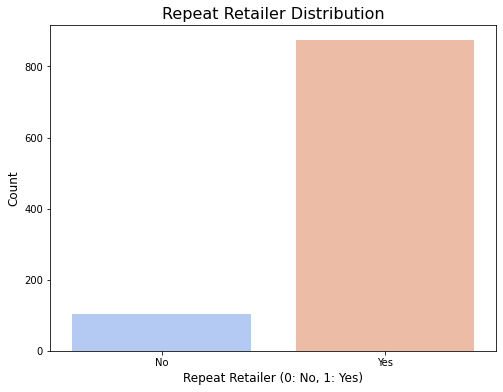

In [7]:
# Visualize the distribution of 'repeat_retailer' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='repeat_retailer', palette='coolwarm')
plt.title('Repeat Retailer Distribution', fontsize=16)
plt.xlabel('Repeat Retailer (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


prompt: # Visualize the used chip distribution
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/1481889218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='used_chip', palette='magma')


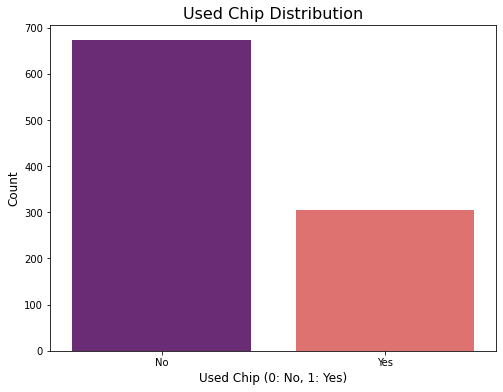

In [8]:
# Visualize the distribution of 'used_chip' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='used_chip', palette='magma')
plt.title('Used Chip Distribution', fontsize=16)
plt.xlabel('Used Chip (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


prompt: # Visualize the online order distribution
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/2257468220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='online_order', palette='viridis')


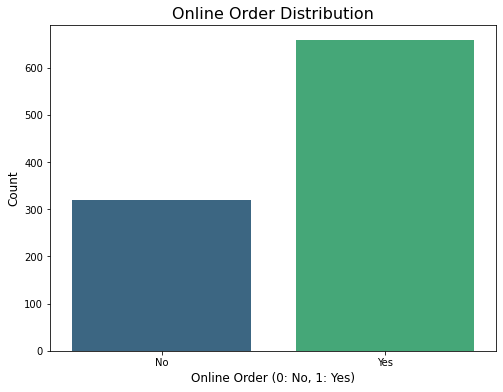

In [9]:
# Visualize the distribution of 'online_order' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='online_order', palette='viridis')
plt.title('Online Order Distribution', fontsize=16)
plt.xlabel('Online Order (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


prompt:Visualize the distribution of 'distance_from_last_transaction'
AI:ChatGPT 4o mini

/tmp/ipykernel_2564391/2257468220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='online_order', palette='viridis')


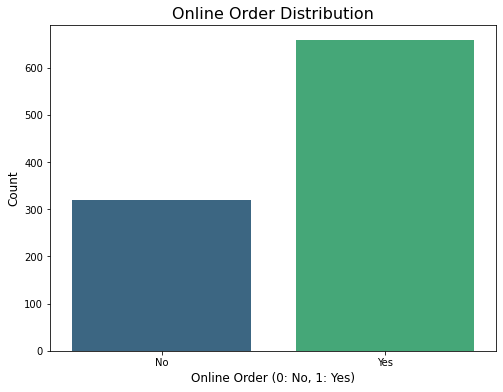

In [10]:
# Visualize the distribution of 'online_order' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='online_order', palette='viridis')
plt.title('Online Order Distribution', fontsize=16)
plt.xlabel('Online Order (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


prompt:Visualize the distribution of 'ratio_to_median_purchase_price'
AI:ChatGPT 4o mini

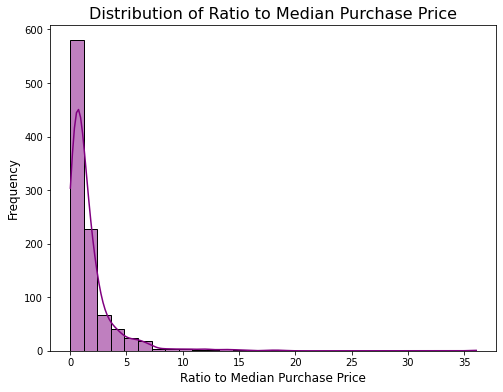

In [12]:
# Visualize the distribution of 'ratio_to_median_purchase_price' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['ratio_to_median_purchase_price'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ratio to Median Purchase Price', fontsize=16)
plt.xlabel('Ratio to Median Purchase Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


prompt: # Visualize the distribution of 'distance_from_home'
AI:ChatGPT 4o mini

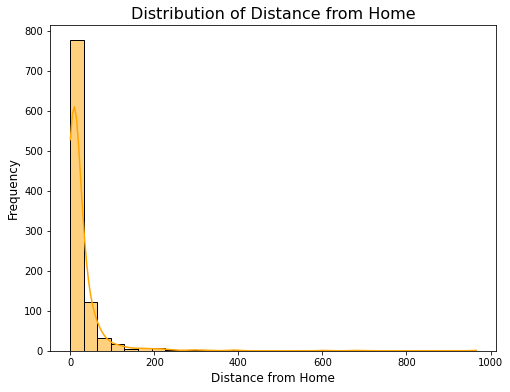

In [13]:
# Visualize the distribution of 'distance_from_home' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['distance_from_home'], bins=30, kde=True, color='orange')
plt.title('Distribution of Distance from Home', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


prompt:make better visualizations that would help to know how fradulent and non-fradulent transactions breakdown each variable
AI:ChatGPT 4o mini

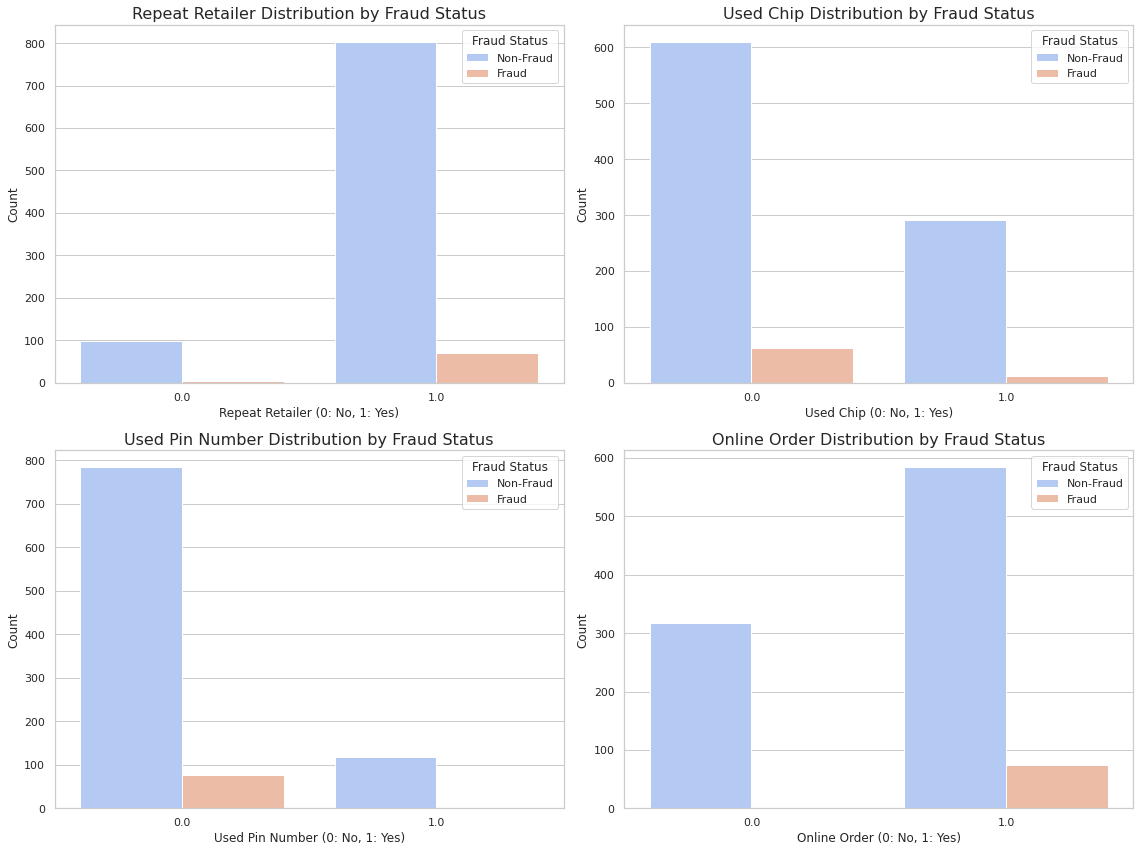

In [15]:
# Set up the visualization style
sns.set(style="whitegrid")

# Create a figure to hold all the subplots
plt.figure(figsize=(16, 12))

# 1. Repeat Retailer Distribution by Fraud
plt.subplot(2, 2, 1)
sns.countplot(data=df_cleaned, x='repeat_retailer', hue='fraud', palette='coolwarm')
plt.title('Repeat Retailer Distribution by Fraud Status', fontsize=16)
plt.xlabel('Repeat Retailer (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# 2. Used Chip Distribution by Fraud
plt.subplot(2, 2, 2)
sns.countplot(data=df_cleaned, x='used_chip', hue='fraud', palette='coolwarm')
plt.title('Used Chip Distribution by Fraud Status', fontsize=16)
plt.xlabel('Used Chip (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# 3. Used Pin Number Distribution by Fraud
plt.subplot(2, 2, 3)
sns.countplot(data=df_cleaned, x='used_pin_number', hue='fraud', palette='coolwarm')
plt.title('Used Pin Number Distribution by Fraud Status', fontsize=16)
plt.xlabel('Used Pin Number (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# 4. Online Order Distribution by Fraud
plt.subplot(2, 2, 4)
sns.countplot(data=df_cleaned, x='online_order', hue='fraud', palette='coolwarm')
plt.title('Online Order Distribution by Fraud Status', fontsize=16)
plt.xlabel('Online Order (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

prompt:for bivariate visualization Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
AI:ChatGPT 4o mini

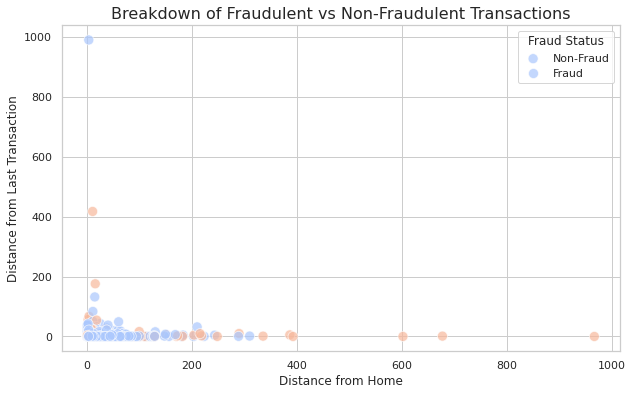

In [16]:
# Set up the visualization style
sns.set(style="whitegrid")

# Create the scatter plot for 'distance_from_home' vs 'distance_from_last_transaction' with fraud breakdown
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned, 
                x='distance_from_home', 
                y='distance_from_last_transaction', 
                hue='fraud',  # This will color the points based on fraud status
                palette='coolwarm',  # Use the coolwarm color palette
                s=100,  # Size of points
                alpha=0.7)  # Transparency of points for better visibility

# Add title and labels
plt.title('Breakdown of Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

prompt:Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
AI:ChatGPT 4o mini

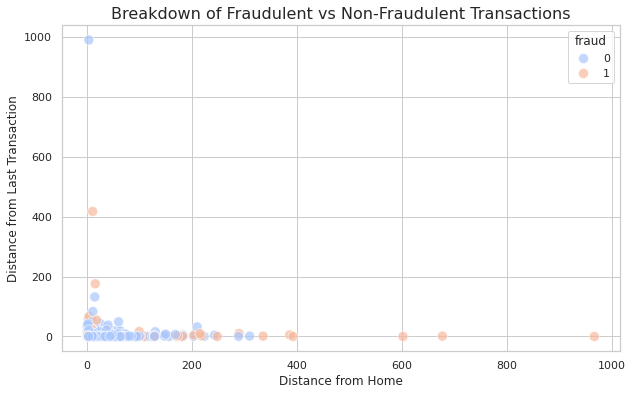

In [17]:
# Create a scatter plot to show the breakdown of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned, 
                x='distance_from_home', 
                y='distance_from_last_transaction', 
                hue='fraud',  # This will color the points based on fraud status
                palette='coolwarm',  # Use the coolwarm color palette
                s=100,  # Size of points
                alpha=0.7)  # Transparency of points for better visibility

# Add title and labels
plt.title('Breakdown of Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)

# Show the plot
plt.show()

prompt:Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions for distance_from_last_transaction vs ratio_to_median_purchase_price
AI:ChatGPT 4o mini

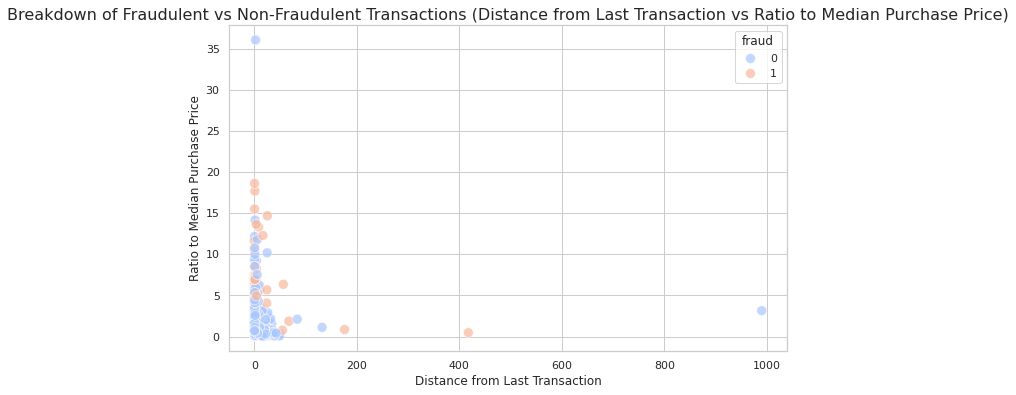

In [18]:
# Create a scatter plot to show the breakdown of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned, 
                x='distance_from_last_transaction', 
                y='ratio_to_median_purchase_price', 
                hue='fraud',  # This will color the points based on fraud status
                palette='coolwarm',  # Use the coolwarm color palette
                s=100,  # Size of points
                alpha=0.7)  # Transparency of points for better visibility

# Add title and labels
plt.title('Breakdown of Fraudulent vs Non-Fraudulent Transactions (Distance from Last Transaction vs Ratio to Median Purchase Price)', fontsize=16)
plt.xlabel('Distance from Last Transaction', fontsize=12)
plt.ylabel('Ratio to Median Purchase Price', fontsize=12)

# Show the plot
plt.show()


prompt:Can we predict if a transaction is a fraud?
Let's start by saving 20% of our data to make our predictions on. We will learn from 80% of the data called X_train and y_train.
AI:ChatGPT 4o mini

In [19]:
# Step 1: Define features (X) and target variable (y)
X = df_cleaned.drop('fraud', axis=1)  # All columns except 'fraud'
y = df_cleaned['fraud']  # Target variable 'fraud'

# Step 2: Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled are ready to be used in machine learning models
print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)


Training data shape: (781, 7)
Testing data shape: (196, 7)


prompt:print out the testing data set below. How many transactions are in the testing set?
AI:
response from AI: It seems like I can’t do more advanced data analysis right now. Please try again later. Let me know if you'd like to proceed with any other aspects of your task or need help with any other part of the analysis.

prompt:create never fraud model that always says that a transaction is not a fraud
AI:

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Create a "never fraud" model that always predicts 0 (non-fraudulent)
def never_fraud_model(X):
    return [0] * len(X)  # Always returns 0 for all data points

# Apply the model to the test set
y_pred_never_fraud = never_fraud_model(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_never_fraud)
classification_rep = classification_report(y_test, y_pred_never_fraud)

# Print results
print(f"Accuracy of 'Never Fraud' model: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


Accuracy of 'Never Fraud' model: 0.9337
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       183
           1       0.00      0.00      0.00        13

    accuracy                           0.93       196
   macro avg       0.47      0.50      0.48       196
weighted avg       0.87      0.93      0.90       196



/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

prompt: do some basic modeling with knn
AI:

In [21]:
# Import the necessary libraries for KNN and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the features (X) and target (y)
X = df_cleaned.drop('fraud', axis=1)  # Features
y = df_cleaned['fraud']  # Target variable

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with n_neighbors
knn.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Step 6: Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print the results
print(f"Accuracy of KNN model: {accuracy_knn:.4f}")
print("Classification Report for KNN model:")
print(classification_rep_knn)


Accuracy of KNN model: 0.9949
Classification Report for KNN model:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      0.92      0.96        13

    accuracy                           0.99       196
   macro avg       1.00      0.96      0.98       196
weighted avg       0.99      0.99      0.99       196



prompt:moving on to model evaluation, create a Confusion matrix for Never Fraud Model and a classification report for it
AI:

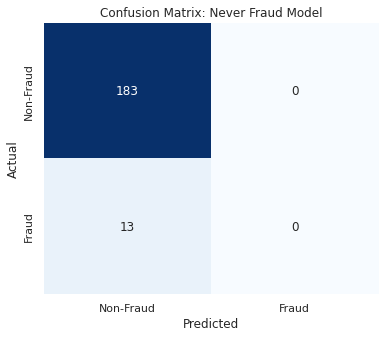

Classification Report for Never Fraud Model:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       183
           1       0.00      0.00      0.00        13

    accuracy                           0.93       196
   macro avg       0.47      0.50      0.48       196
weighted avg       0.87      0.93      0.90       196



/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the "Never Fraud" model predictions
# This model always predicts that the transaction is not fraudulent (0)
y_pred_never_fraud = [0] * len(y_test)

# Step 2: Compute the confusion matrix for the Never Fraud model
cm_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_never_fraud, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title('Confusion Matrix: Never Fraud Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 4: Create the classification report for the Never Fraud model
classification_rep_never_fraud = classification_report(y_test, y_pred_never_fraud)

# Print the classification report
print("Classification Report for Never Fraud Model:")
print(classification_rep_never_fraud)


prompt: do the same for knn
AI:

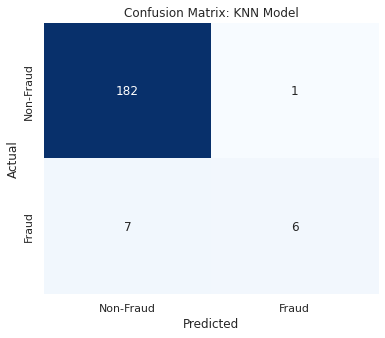

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       183
           1       0.86      0.46      0.60        13

    accuracy                           0.96       196
   macro avg       0.91      0.73      0.79       196
weighted avg       0.96      0.96      0.95       196



In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k
knn.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Step 3: Compute the confusion matrix for the KNN model
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title('Confusion Matrix: KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: Create the classification report for the KNN model
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print the classification report
print("Classification Report for KNN Model:")
print(classification_rep_knn)


prompt:now we will move on to comparison of model performance and compute metrics for never fraud and knn
AI:

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Evaluate the Never Fraud Model (Predicted 0 for all transactions)
y_pred_never_fraud = [0] * len(y_test)  # Never Fraud Model always predicts non-fraud (0)

# Step 2: Compute the performance metrics for Never Fraud Model
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud)

# Step 3: Compute the performance metrics for KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Step 4: Create a comparison table
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Never Fraud Model': [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud],
    'KNN Model': [accuracy_knn, precision_knn, recall_knn, f1_knn]
})

# Display the comparison table
print(performance_comparison)


      Metric  Never Fraud Model  KNN Model
0   Accuracy           0.933673   0.959184
1  Precision           0.000000   0.857143
2     Recall           0.000000   0.461538
3   F1-Score           0.000000   0.600000


/home/jupyter-tmadakad/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


prompt:Prepare data for visualization
AI:

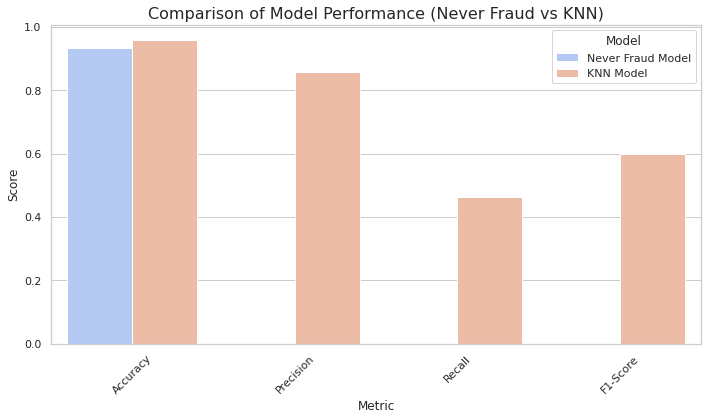

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute the metrics for both models (as before)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Never Fraud Model Metrics (these will be based on the results computed earlier)
metrics_never_fraud = [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud]

# KNN Model Metrics (these will be based on the results computed earlier)
metrics_knn = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Step 2: Prepare a DataFrame for visualization
df_metrics = pd.DataFrame({
    'Metric': metrics,
    'Never Fraud Model': metrics_never_fraud,
    'KNN Model': metrics_knn
})

# Step 3: Reshape data to long format for easier plotting
df_metrics_long = df_metrics.melt(id_vars=['Metric'], value_vars=['Never Fraud Model', 'KNN Model'],
                                  var_name='Model', value_name='Score')

# Step 4: Create a comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics_long, palette='coolwarm')
plt.title('Comparison of Model Performance (Never Fraud vs KNN)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


prompt: do 3d visualization of knn prediction
AI: 

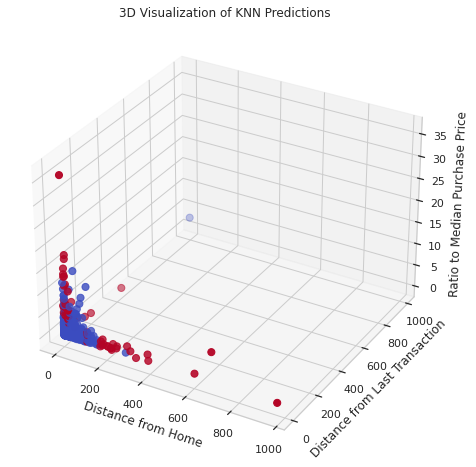

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Select 3 features for 3D visualization
X = df_cleaned[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']]
y = df_cleaned['fraud']

# Step 2: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Step 3: Make predictions
predictions = knn.predict(X)

# Step 4: Create a 3D plot to visualize the predictions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points, coloring them based on the prediction
ax.scatter(X['distance_from_home'], X['distance_from_last_transaction'], X['ratio_to_median_purchase_price'], 
           c=predictions, cmap='coolwarm', s=50, marker='o')

# Add labels and title
ax.set_xlabel('Distance from Home')
ax.set_ylabel('Distance from Last Transaction')
ax.set_zlabel('Ratio to Median Purchase Price')
ax.set_title('3D Visualization of KNN Predictions')

# Show the plot
plt.show()
